# 이미지를 정사각형으로 만들기

## 주요 방법 
1. Padding
2. Crop
3. Squash (Warp)

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize

## Padding

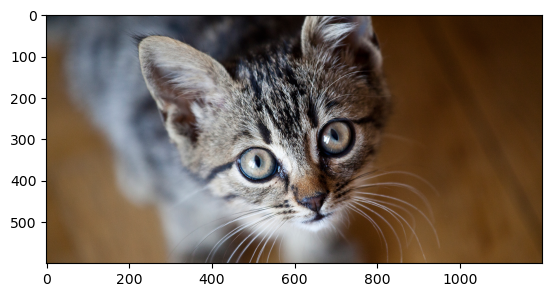

In [2]:
cat_img = image.load_img('cat1.png')
cat_vector = np.asarray(image.img_to_array(cat_img))
cat_vector = cat_vector/255
plt.imshow(cat_vector)

In [3]:
cat_vector.shape

(600, 1200, 3)

In [4]:
target_height = 1200
target_width = 1200

source_height = cat_vector.shape[0]
source_width = cat_vector.shape[1]

cat_vector_pad = pad_to_bounding_box(cat_vector, int((target_height-source_height)/2),int((target_width-source_width)/2),
                               target_height, target_width)

In [5]:
cat_vector_pad.shape

TensorShape([1200, 1200, 3])

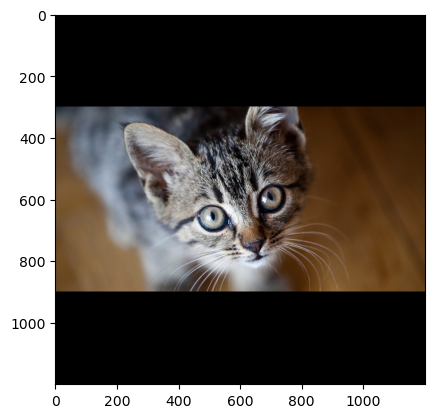

In [6]:
plt.imshow(cat_vector_pad)
plt.show()

In [7]:
image.save_img('cat1_pad.png', cat_vector_pad)

## Cropping

이미지의 가운데를 중심으로 crop 하기

In [7]:
cat_vector_crop = central_crop(cat_vector, .5) # 원본 이미지의 50%만을 crop (가운데를 중심으로)
# 정사각형으로 만드는 것은 아님

In [8]:
cat_vector_crop.shape

TensorShape([300, 600, 3])

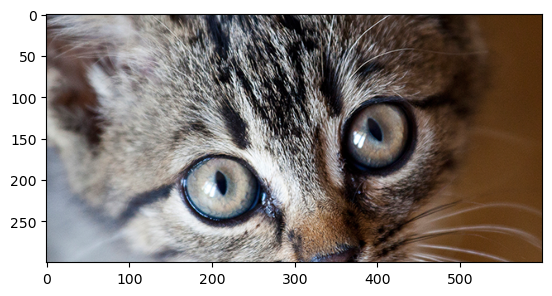

In [9]:
plt.imshow(cat_vector_crop)
plt.show()

또 다른 방법

1200 600 300 0 600


(600, 600)

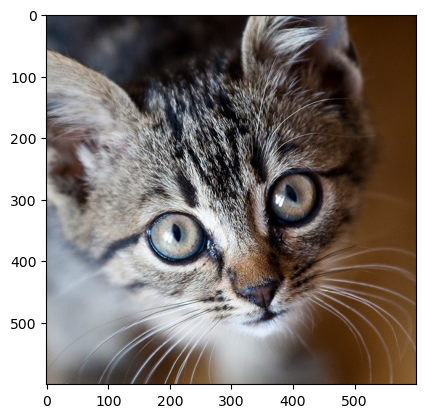

In [10]:
# from PIL import Image
# 가로와 세로 중 짧은 길이를 이용해서 정사각형으로 cropping
img = image.load_img('cat1.png')
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img = img.crop((x, y, x+s, y+s))
# 4-tuple defining the left, upper, right, and lower pixel coordinate
plt.imshow(np.asarray(img))
img.size

## Warping

In [11]:
cat_vector_resize = resize(cat_vector, (300,300))

In [12]:
cat_vector_resize.shape

TensorShape([300, 300, 3])

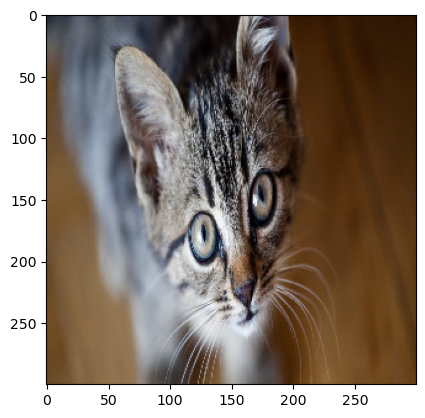

In [13]:
plt.imshow(cat_vector_resize)